<a href="https://colab.research.google.com/github/hyprex-deva/CodeClause_Movie_Analysis/blob/main/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv('tmdb_5000_credits.csv', encoding='ISO-8859-1')
df2=pd.read_csv('tmdb_5000_movies.csv', encoding='ISO-8859-1')

In [3]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [4]:
df2.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
4688,0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://manfromearth.com/,13363,"[{""id"": 490, ""name"": ""philosophy""}, {""id"": 132...",en,The Man from Earth,An impromptu goodbye party for Professor John ...,31.339015,"[{""name"": ""Falling Sky Entertainment"", ""id"": 2...",...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,From one of the acclaimed writers of Star Trek...,The Man from Earth,7.7,687,The Man from Earth,"[{""cast_id"": 3, ""character"": ""John Oldman"", ""c...","[{""credit_id"": ""52fe45609251416c75054411"", ""de..."
1145,40000000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 53, ""...",NaN,745,"[{""id"": 516, ""name"": ""child abuse""}, {""id"": 13...",en,The Sixth Sense,A psychological thriller about an eight year o...,73.085576,"[{""name"": ""Spyglass Entertainment"", ""id"": 158}...",...,107.0,"[{""iso_639_1"": ""la"", ""name"": ""Latin""}, {""iso_6...",Released,Not every gift is a blessing.,The Sixth Sense,7.7,3147,The Sixth Sense,"[{""cast_id"": 9, ""character"": ""Malcolm Crowe"", ...","[{""credit_id"": ""52fe426fc3a36847f801e775"", ""de..."
2086,18000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",NaN,772,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 242, ""n...",en,Home Alone 2: Lost in New York,"Instead of flying to Florida with his folks, K...",81.487685,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,He's up past his bedtime in the city that neve...,Home Alone 2: Lost in New York,6.3,2395,Home Alone 2: Lost in New York,"[{""cast_id"": 12, ""character"": ""Kevin"", ""credit...","[{""credit_id"": ""52fe4274c3a36847f802001b"", ""de..."
1275,50000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,1272,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Sunshine,"Fifty years into the future, the sun is dying,...",51.502884,"[{""name"": ""DNA Films"", ""id"": 284}, {""name"": ""I...",...,107.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"If the sun dies, so do we.",Sunshine,7.0,1182,Sunshine,"[{""cast_id"": 5, ""character"": ""Robert Capa"", ""c...","[{""credit_id"": ""5378a9080e0a261425004f95"", ""de..."
3724,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,270938,"[{""id"": 1794, ""name"": ""yakuza""}, {""id"": 11399,...",en,Falcon Rising,"Chapman is an ex-marine in Brazil's slums, bat...",6.988357,"[{""name"": ""Strohberry Films"", ""id"": 39075}]",...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Falcon Rising,5.5,71,Falcon Rising,"[{""cast_id"": 0, ""character"": ""John 'Falcon' Ch...","[{""credit_id"": ""537cc3a70e0a26316200067c"", ""de..."


In [5]:
C= df2['vote_average'].mean()
C

6.092171559442016

In [6]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [7]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [10]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

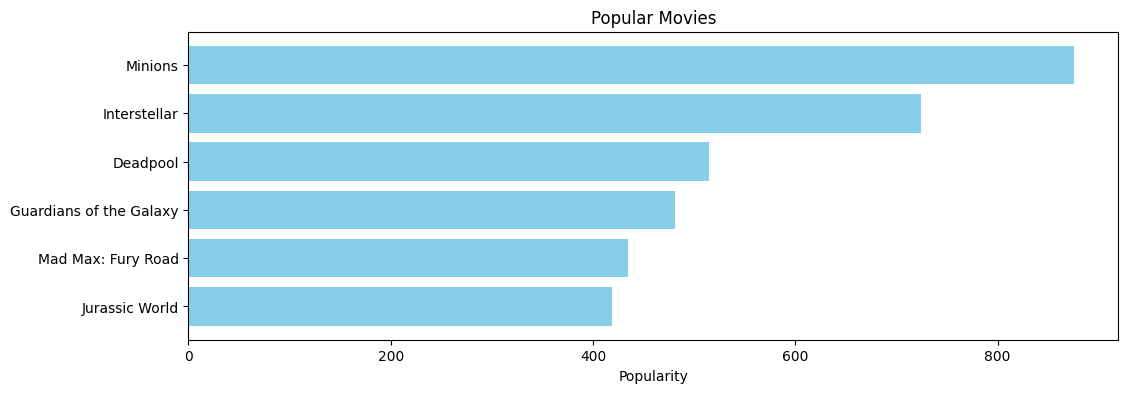

In [11]:
# Top 6 popular Movies
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# **Various Movie Rating Analysis**

In [12]:
import seaborn as sns

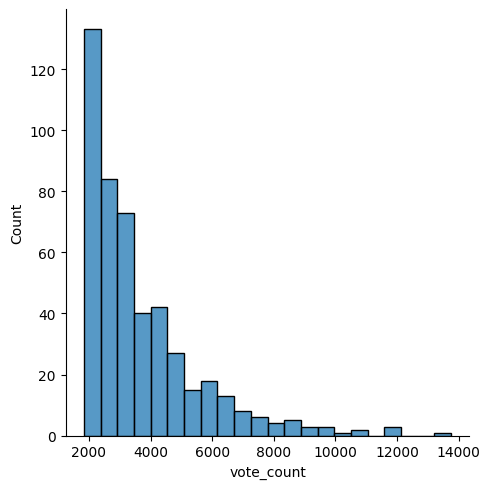

In [13]:
sns.displot(q_movies['vote_count'])

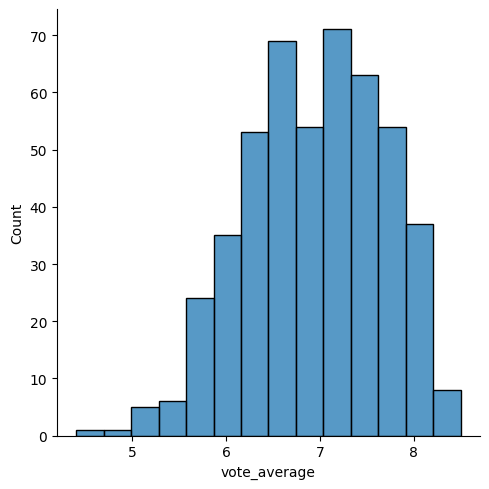

In [14]:
sns.displot(q_movies['vote_average'])

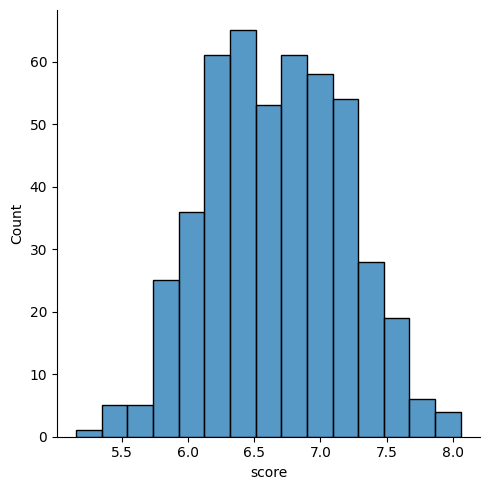

In [15]:
sns.displot(q_movies['score'])

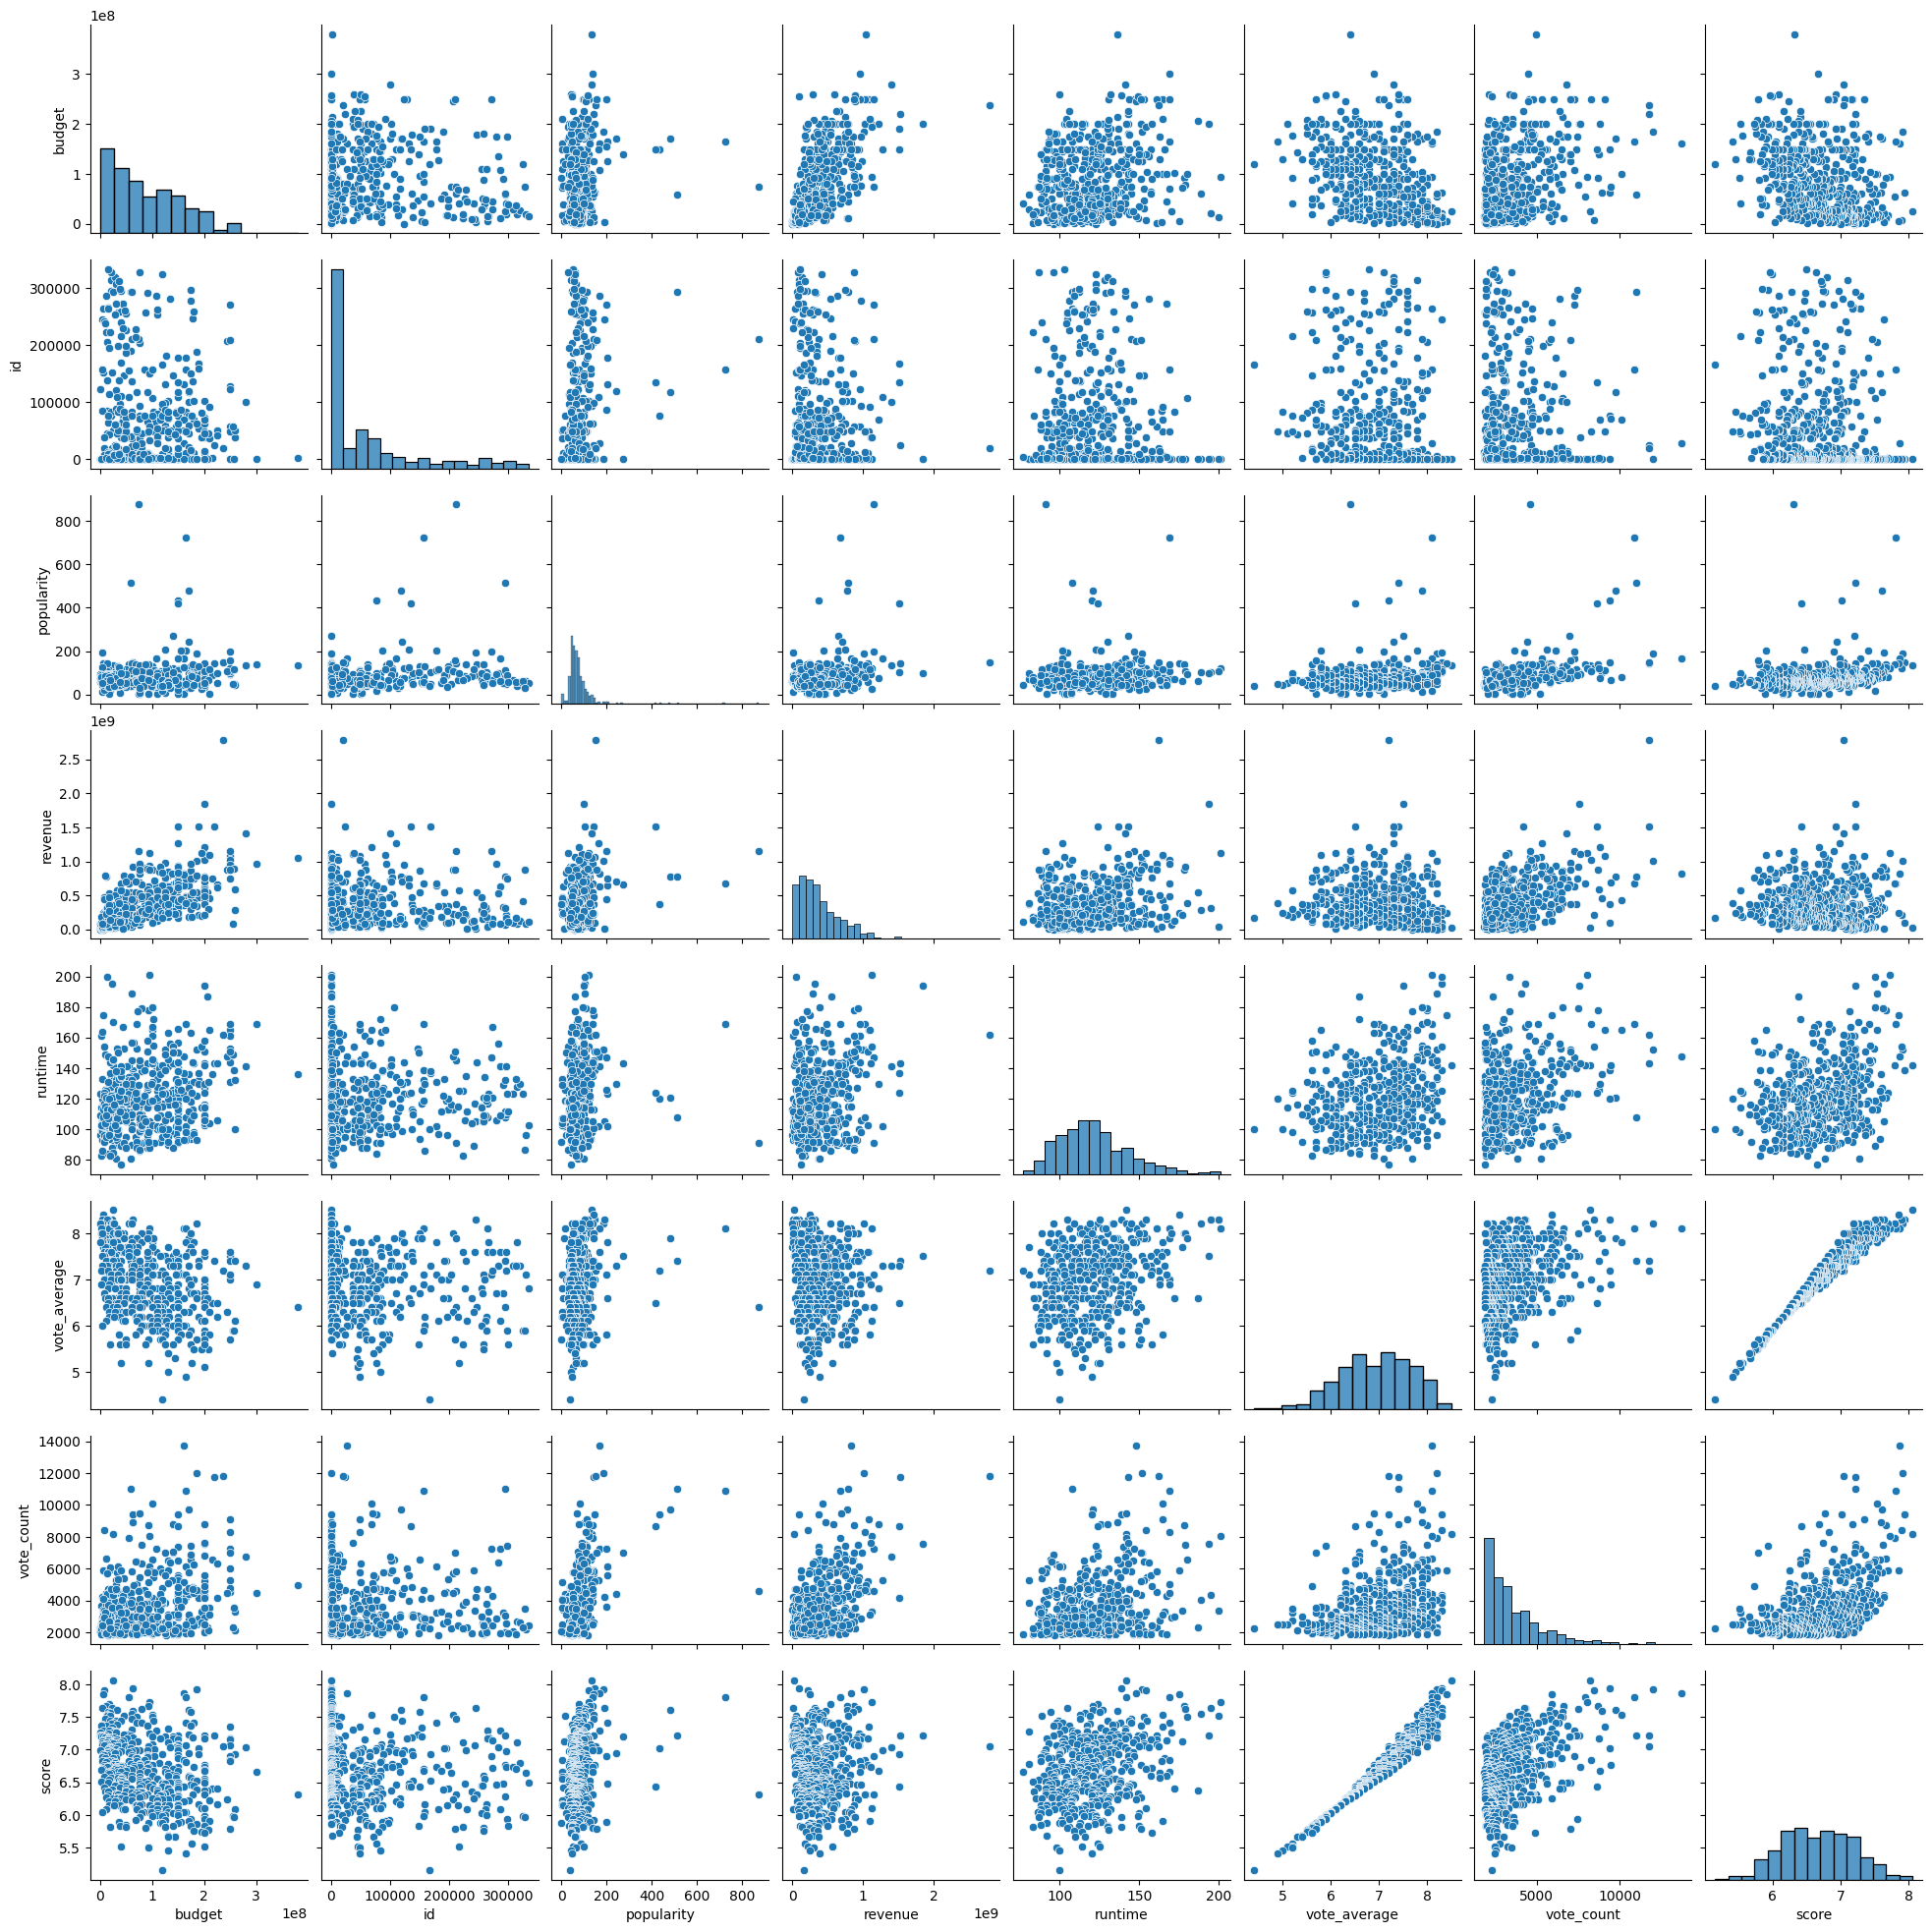

In [16]:
sns.pairplot(q_movies)

<ipython-input-17-304968466669>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(q_movies.corr(), annot=True)


<Axes: >

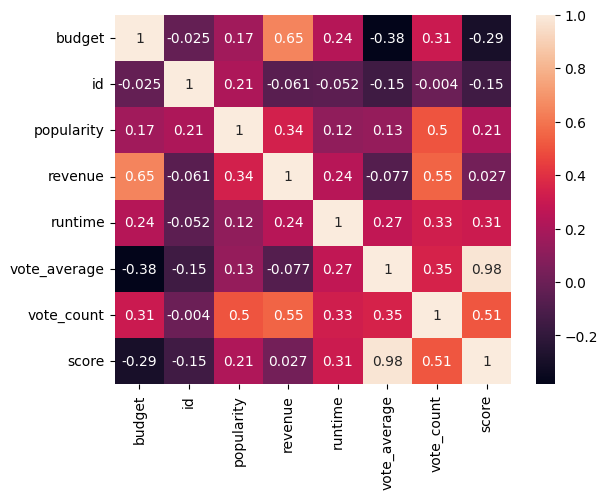

In [17]:
sns.heatmap(q_movies.corr(), annot=True)

# **Credits, Genres and Keywords Based Recommender**

In [18]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 21241)

In [19]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [20]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [21]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [22]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [23]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [24]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [25]:
# Print the new features of the first 5 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(5)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [26]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [27]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [28]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [29]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [30]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [31]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [32]:
get_recommendations('Superman', cosine_sim2)

870                                           Superman II
2433                     Superman IV: The Quest for Peace
10                                       Superman Returns
14                                           Man of Steel
1296                                         Superman III
9                      Batman v Superman: Dawn of Justice
71                  The Mummy: Tomb of the Dragon Emperor
786                                     The Monkey King 2
53      Indiana Jones and the Kingdom of the Crystal S...
103                             The Sorcerer's Apprentice
Name: title, dtype: object

In [33]:
get_recommendations('Iron Man', cosine_sim2)

79                      Iron Man 2
7          Avengers: Age of Ultron
16                    The Avengers
26      Captain America: Civil War
31                      Iron Man 3
39                    TRON: Legacy
4401           The Helix... Loaded
83                      The Lovers
193                    After Earth
4117            Six-String Samurai
Name: title, dtype: object

In [34]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

**Dataset :** [https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)